In [24]:
!pip install yfinance

In [25]:
import yfinance as yf
import os
import pandas as pd

ticker object will download the price history of a certain symbol.
we are using btc usd (it's the price of bitcoin relative to the us dollar)

In [26]:
btc_ticker = yf.Ticker("BTC-USD")

In [27]:
type(btc_ticker)

yfinance.ticker.Ticker

we download that history

In [28]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [29]:
btc
#here,there's not necessarily an open or a close price or dividends for bitcoin because yahoo finance tracks stocks so it's formatted like this. for columns to really track stocks effectively we have to cleanup to make them easier to use(we have the open price which is the opening price.for the day for bitcoin we have the close price which is the price at the end of the day)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-07-08 00:00:00+00:00,30346.921875,30374.437500,30080.160156,30292.541016,7509378699,0.0,0.0
2023-07-09 00:00:00+00:00,30291.611328,30427.589844,30085.591797,30171.234375,7903327692,0.0,0.0
2023-07-10 00:00:00+00:00,30172.423828,31026.083984,29985.394531,30414.470703,14828209155,0.0,0.0


we will now convert our index to a date time indexas  converting it to a date time index makes it a bit easier to work with because the values , and also delete a couple of our extra columns that we dont really need

In [30]:
btc.index = pd.to_datetime(btc.index)

In [31]:
del btc["Dividends"]
del btc["Stock Splits"]

(here i have just made the colim names all small ,to make it convinient to type)

In [32]:
btc.columns = [c.lower() for c in btc.columns]

plot of closing price against our index(which is the date)
we can see the price history of bitcoin here

<Axes: xlabel='Date'>

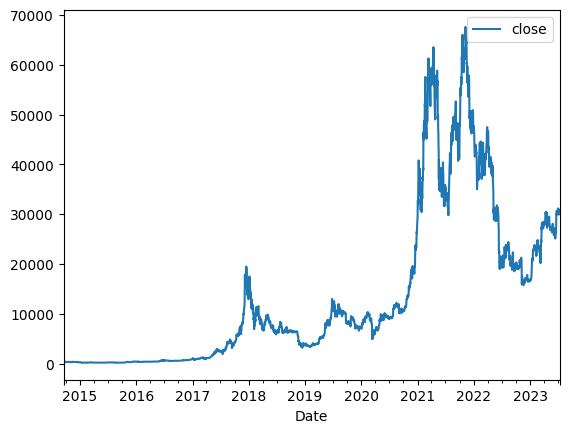

In [33]:
btc.plot.line(y="close", use_index=True)


In [34]:
wiki=pd.read_csv("https://github.com/dataquestio/project-walkthroughs/raw/master/bitcoin_price/wikipedia_edits.csv", index_col=0, parse_dates=True)

we're going to merge our bitcoin price data with our wikipedia edit data and we do the merge them based on the index

In [35]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2022-09-04,0.400000,-0.108480,0.150000
2022-09-05,0.400000,-0.108480,0.150000
2022-09-06,0.433333,-0.081502,0.150000
2022-09-07,0.433333,-0.081502,0.150000


In [36]:
btc.index = btc.index.tz_localize(None)

In [37]:
btc = btc.merge(wiki, left_index=True, right_index=True)


we want to predict the direction of bitcoin price tomorrow so we will make a column 'tomorrow'. here we are taking the closing price amnd shifting back one day

In [38]:
btc["tomorrow"] = btc["close"].shift(-1)


 set up our target column which is going to be a 'one' if the price went up and a 'zero' if the price went down
so we'll first say if tomorrow is greater than the close price,return a boolean true and  convert that boolean to an integer so if the price went up the integer will be a one if the price went down the integer will be a zero

In [39]:
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)


(here we can see price went up about as many times the price went down)

In [40]:
btc["target"].value_counts()


1    1563
0    1351
Name: target, dtype: int64

In [41]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,394.795990,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1
...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,25245861652,0.400000,-0.108480,0.150000,19812.371094,0
2022-09-05,19988.789062,20031.160156,19673.046875,19812.371094,28813460025,0.400000,-0.108480,0.150000,18837.667969,0
2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,43403978910,0.433333,-0.081502,0.150000,19290.324219,1
2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,35239757134,0.433333,-0.081502,0.150000,19329.833984,1


a baseline model: it is a model that runs pretty quickly and will just give us a baseline accuracy that we can try to improve on so the baseline model ,here we use random forest, because it doesnt overfit)

->estimators is the number of individual decision trees that we want to train
 ->min sample split equals 50. means each individual decision tree should not split its nodes unless it has at least 50 samples ( higher this number is the lower the performance on the training set but the less it will overfit so this parameter helps you avoid overfitting to the training set)

-> random state = one (random forest involves a lot of random numbers and setting a random state will ensure those random numbers are generated in the same order so that if you just run this model twice without changing anything you'll get the same results)

In [42]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)



 #we split in test and train



train = btc.iloc[:-200]
test = btc.iloc[-200:]


#list of predictors (columns that we're going to use to predict our target)


predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

our model is fit,now  we can actually make predictions and evaluate how effective our predictions were and to do that we use the precision score



we'll create our predictions using the predict method and convert it into series

In [43]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.48484848484848486

In [44]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])#generate our predictions using the test predictors, and turn that into a series and name our series predictions
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)#arget and our predictions will be separate columns
    return combined

evaluating error with backtesting.   upar error was just for last 200 rows .which isnt a very good . backtesting allows to check over all rows over time

we have data from 2014 all the way through to 2022. in backtesting,we take data from 2014 to 2017 use that to predict 2018. thwn data from 2014 through 2018 use that to predict 2019

In [45]:
def backtest(data, model, predictors, start=1095, step=150):#1095 is about three years of historical data, and step size is 6months of time(we don't have any historical data before 2014. so thats what start is )
    all_predictions = []#define a list of all predictions

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)#append our predictions to all predictions

    return pd.concat(all_predictions)

    #don't have to just evaluate the model based on 200 rows we can evaluate it based on years and years of data

xgboost trains a lot of individual models decision trees like RF and connects them together

In [46]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)#defines if we want the model to protect against overfitting or not so the lower the learning rate
predictions = backtest(btc, model, predictors)#generate predictions using backtest

In [47]:
predictions["predictions"].value_counts()

1    1084
0     735
Name: predictions, dtype: int64

In [48]:
precision_score(predictions["target"], predictions["predictions"])


0.5009225092250923

best way to improve accuracy is to either get more data or generate new predictors that would be informative to the model so we write a function called compute rolling. it find the trend in various columns over the last period.


min periods does is it avoids those na values by saying even if you only have one period worth of data compute the average for that one period

In [49]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"#ratio between the current close price and the historical close prices
        btc[ratio_column] = btc["close"] / rolling_averages["close"]

        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]
#ratio between the current close price in the row and the close price over the last 2,7 , 60 and 365 days
        new_predictors+= [ratio_column, trend_column, edit_column]#general trend so we'll have to recompute rolling
    return btc, new_predictors


In [50]:
btc, new_predictors = compute_rolling(btc.copy())


columns like trend_2 close_ratio_2 edit_7 trend_7  correspond to the  labels we created earlier

close ratio_horizon edit underscore horizon, for each of these horizons 2,7,60 and 365 we have three separate columns:  close ratio, edit column , trend column


In [51]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_7,trend_7,close_ratio_60,edit_60,trend_60,close_ratio_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232759,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,25245861652,0.400000,-0.108480,0.150000,19812.371094,0,...,0.5,0.998906,0.342857,0.571429,0.906969,0.270556,0.433333,0.505329,0.891050,0.482192
2022-09-05,19988.789062,20031.160156,19673.046875,19812.371094,28813460025,0.400000,-0.108480,0.150000,18837.667969,0,...,0.5,0.993637,0.357143,0.428571,0.900301,0.267222,0.416667,0.502031,0.890776,0.479452
2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,43403978910,0.433333,-0.081502,0.150000,19290.324219,1,...,0.0,0.951291,0.376190,0.428571,0.857889,0.264444,0.400000,0.478456,0.890594,0.476712
2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,35239757134,0.433333,-0.081502,0.150000,19329.833984,1,...,0.5,0.979516,0.395238,0.428571,0.880041,0.262222,0.416667,0.490893,0.889954,0.479452


In [52]:
predictions = backtest(btc, model, new_predictors)#we have these new predictors we can back test again


In [53]:
precision_score(predictions["target"], predictions["predictions"])

0.5386289445048966

In [54]:
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,0
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2022-09-04,0,1
2022-09-05,0,1
2022-09-06,1,1
2022-09-07,1,1


last element is going to be the prediction for tomorrow